# 3/ Exploration des données 
* analyse univariées Ex : fonction "describe" analyse bivariées analyse multivariées (analyse en composantes principales "ACP" et une analyse explicative avec l'ANOVA)

# 4/ Présentation de l'aidée d'application
ctégorie du produit la valeur nutritionnelle le nombre d’additifs ; des produits plus sains

la variable la plus importante "nutrition score" classer les par pays par catégorie et par mot clès

#  Importation de packages et définition de fonctions

In [1]:
# Impotation librairies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from sklearn import preprocessing


In [2]:
#visualiser l'ensemble du dataframe, toutes les lignes et colonnes.Faire apparaitre l'ensemble des informations.
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_column", 180)
pd.set_option("display.max_colwidth", 15)

In [3]:
#********************************** Calcule des valeurs nulles + pourcentage: ******************************
def calc_inf (df,line):
    
    # ****************** Définition des variabes************************************************************
    nb_line_nan = nb_line_mix = nb_line_ssna= nb_col_nan = nb_col_mix = nb_col_ssna = 0   
         
    #***************************************************** Les statistiques NaN par colonne*****************
    
    n_list = df.isnull().sum().tolist()
    for i in range(len(n_list)):
        if n_list[i] == 0:                     # Nombre de colonnes sans NaN
            nb_col_ssna += 1  
        elif n_list[i] == len(df):             # Nombre de colonnes nulles
            nb_col_nan += 1
        elif 0 < n_list[i] < len(df):          # Nombre de colonnes mixtes
            nb_col_mix += 1
    print("* Nombre de colonnes sans NaN -------:",nb_col_ssna)
    print("* Nombre de colonnes NaN ------------:", nb_col_nan)
    print("* Nombre de colonnes mixtes----------:",nb_col_mix)
   # *************************************** Les statistiques NaN par ligne ********************************

    if line == True:
        for j in range(len(df.index)) :
            if df.iloc[j].isnull().sum() == len(df.columns):         # Nombre de lignes nulles
                nb_line_nan += 1
            elif 0 < df.iloc[j].isnull().sum() < len(df.columns):    # Nombre de lignes mixtes
                nb_line_mix += 1
            elif df.iloc[j].isnull().sum() == 0:                     # Nombre de lignes sans NaN
                nb_line_ssna += 1
        print("* Nombre de ligne entièrement nulles :",nb_line_nan)  
        print("* Nombre de ligne mixtes ----------- :", nb_line_mix) 
        print("* Nombre de ligne sans NaN ----------:", nb_line_ssna)
    #*******************************************************************************************************
    nb_line = df.index.size
    nb_colonne = df.columns.size
    tot = (nb_colonne*nb_line)
    nan = df.isnull().sum().sum()
    nan_prcnt = (100 * nan) / tot
    not_nan = df.notna().sum().sum()
    not_nan_prcnt = float((100 * not_nan) / tot)
    #*******************************************************************************************************
    
    print("* Nombre de lignes -----------------------: {:.0f}".format(nb_line))
    print("* Nombre de colonnes ---------------------: {:.0f}".format(nb_colonne))
    print("* Nombre de cases ------------------------: {:.0f}".format(tot))
    print("* Nombre de valeurs nulles ---------------: {:.0f}".format(nan))
    print("* Nombre de valeurs non nulles -----------: {:.0f}".format(not_nan))
    print("* le pourcentage des valeurs nulles ------:",str("%.1f" % nan_prcnt) + ' %')
    print("* le pourcentage des valeurs non nulles --:",str("%.1f" % not_nan_prcnt) + ' %')
    #a = pd.concat([not_nan_prcnt,nan_prcnt])
    # *******************************************************************************************************
    
    t= [not_nan_prcnt, nan_prcnt]
    plt.pie(t, labels = ['Valeurs non nulles', 
                         'Valeurs nulles (NaN)'],colors =['c', 'r'],
            startangle = 90, shadow = True, explode =(0,0.1),
            autopct = "%1.1f%%", normalize = True)
    plt.title("Le taux de remplissage en %")
    plt.show()

In [4]:
#************************************ Valeurs manquantes et pourcentage en tableau % **************************************

def mssng_val(df):
    mssng_t = pd.DataFrame(columns=['Variable_name', 'Missing_values', 'Missing_rate'])
    mssng_t['Variable_name'] = df.columns
    
    missing = list()
    percentage_missing = list()
    
    for col in df.columns:
        nb_missing = df[col].isna().sum()                  # le nombre des valeurs NaN par colonne
        pc_missing = df[col].isna().sum()/df[col].size     # le pourcentage des valeurs NaN par colonne
        
        missing.append(nb_missing)
        percentage_missing.append(pc_missing)
        
    mssng_t['Missing_values'] = list(missing)
    mssng_t['Missing_rate'] = list(percentage_missing)
    mssng_t = mssng_t.sort_values(by= ['Missing_values'], ascending = False)
    return mssng_t

In [5]:
def comp_val(df):
    comp_t = pd.DataFrame(columns=['Variable_name', 'completation_values', 'completation_rate'])
    comp_t['Variable_name'] = df.columns
    
    completation = list()
    percentage_completation = list()
    
    for col in df.columns:
        nb_completation = df[col].notna().sum()                 # le nombre des valeurs non NaN par colonne
        pc_completation = (df[col].notna().sum()/df[col].size)*100     # le pourcentage des valeurs non NaN par colonne
        
        completation.append(nb_completation)
        percentage_completation.append(pc_completation)
        
    comp_t['completation_values'] = list(completation)
    comp_t['completation_rate'] = list(percentage_completation)
    comp_t = comp_t.sort_values(by= ['completation_values'], ascending = False)
    return comp_t

In [6]:
#*********************************** Choix interquartile ****************************************
def flt_nan(df, seuil):
    df_flt = df.copy()
    for col in df.columns:
        x = (df[col].isna().sum()/df.shape[0])*100 # df.shape[0] ==> index, df.shape[1] ==> columns
        if x >= seuil:
            df_flt = df_flt.drop(columns= col)
  
    #data_set["not_na"].plot(kind ='bar',color = "red", figsize = (15, 5))
    #plt.title('Présentation des colonnes en-dessus de 20% de Nan', size=20)
    
    #data_set["not_na"].plot(kind ='bar', figsize = (15, 5))
    #plt.title('Présentation des valeurs non_na et Nan par variable', size=15)
    return df_flt

In [7]:
def pie_pc(df):
    nb_line = df.index.size
    nb_colonne = df.columns.size
    tot = (nb_colonne*nb_line)
    nan_prcnt = float((100 * df.isnull().sum().sum()) / tot)
    not_nan_prcnt = float((100 * df.notna().sum().sum()) / tot)
    t= [not_nan_prcnt,nan_prcnt]
    plt.pie(t, labels = ['Valeurs non nulles', 'Valeurs nulles (NaN)'],colors =['c', 'r'],
    startangle = 90, shadow = True, explode =(0,0.1), autopct = "%1.1f%%", normalize = True)
    plt.title("Le taux de remplissage en %")
    plt.show()

# 1/ La récupération de Dataset food_facts_clean: 

In [8]:
food_facts_clean = pd.read_csv("D:/Projet Classrooms/Projet_3/food_facts_clean.csv", low_memory=False )
nutri_score = food_facts_clean.copy()

In [9]:
nutri_score

Unnamed: 0           code         creator created_datetime  \
0                2  0000000004559  usda-ndb-im...  2017-03-09T...    
1                3  0000000016087  usda-ndb-im...  2017-03-09T...    
2                7  0000000016124  usda-ndb-im...  2017-03-09T...    
3               12  0000000016872  usda-ndb-im...  2017-03-09T...    
4               15  0000000018012  usda-ndb-im...  2017-03-09T...    
...            ...            ...             ...             ...    
214609      320742  9787461062105  usda-ndb-im...  2017-03-09T...    
214610      320751  9847548283004       drmalabar  2015-07-25T...    
214611      320757  9900000000233         kiliweb  2017-04-01T...    
214612      320763       99111250        balooval  2013-04-28T...    
214613      320768       99567453  usda-ndb-im...  2017-03-09T...    

          product_name          brands countries_fr nutrition_grade_fr  \
0              Peanuts  Torn & Glasser   États-Unis               b      
1       Organic Sal...       Grizzlies   États-Unis               d      
2       Organic Muesli  Daddy's Muesli   États-Unis               c      
3        Zen Party Mix        Sunridge   États-Unis               d      
4       Cinnamon Nu...       Grizzlies   États-Unis               b      
...                ...             ...          ...             ...      
214609  Natural Cas...  Industria D...   États-Unis               a      
214610  Tartines cr...  Le Pain des...       France               a      
214611         Amandes          Biosic       France               b      
214612  Thé vert Ea...         Lobodis       France               c      
214613  Mint Melang...    Trader Joe's   États-Unis               b      

         pnns_groups_1   pnns_groups_2  energy_100g   fat_100g  \
0            To Define       To Define       1941.0  17.860000   
1            To Define       To Define       2540.0  57.140000   
2            To Define       To Define       1833.0  18.750000   
3            To Define       To Define       2230.0  36.670000   
4            To Define       To Define       1824.0  18.180000   
...                ...             ...          ...        ...   
214609       To Define       To Define       1477.0   0.000000   
214610  Cereals And...           Bread       1643.0   2.800000   
214611       To Define       To Define       2406.0  12.505408   
214612       Beverages  Non-Sugared...         21.0   0.200000   
214613       To Define       To Define          0.0   0.000000   

        saturated-fat_100g  cholesterol_100g  carbohydrates_100g  sugars_100g  \
0                 0.00            0.000000         60.710000            17.86   
1                 5.36            0.018331         17.860000             3.57   
2                 4.69            0.018331         57.810000            15.62   
3                 5.00            0.018331         36.670000             3.33   
4                 1.82            0.018331         60.000000            21.82   
...                ...                 ...               ...              ...   
214609            0.00            0.000000         87.060000             2.35   
214610            0.60            0.001403         74.800000             2.60   
214611            3.73            0.018331         33.357108             3.89   
214612            0.20            0.000786          0.500000             0.50   
214613            0.00            0.000000          0.000000             0.00   

        fiber_100g  proteins_100g  salt_100g  nutrition-score-fr_100g  
0              7.1          17.86    0.63500             0.0           
1              7.1          17.86    1.22428            12.0           
2              9.4          14.06    0.13970             7.0           
3              6.7          16.67    1.60782            12.0           
4              9.1          14.55    0.02286             0.0           
...            ...            ...        ...             ...           
214609  

In [10]:
nutri_score['nutrition_grade_fr'] = nutri_score['nutrition_grade_fr'].apply(lambda x : x.title() if x != 0 else x)
nutri_score = nutri_score.drop(columns = 'Unnamed: 0')


In [11]:
nutri_score

code         creator created_datetime    product_name  \
0       0000000004559  usda-ndb-im...  2017-03-09T...          Peanuts   
1       0000000016087  usda-ndb-im...  2017-03-09T...   Organic Sal...   
2       0000000016124  usda-ndb-im...  2017-03-09T...   Organic Muesli   
3       0000000016872  usda-ndb-im...  2017-03-09T...    Zen Party Mix   
4       0000000018012  usda-ndb-im...  2017-03-09T...   Cinnamon Nu...   
...               ...             ...             ...              ...   
214609  9787461062105  usda-ndb-im...  2017-03-09T...   Natural Cas...   
214610  9847548283004       drmalabar  2015-07-25T...   Tartines cr...   
214611  9900000000233         kiliweb  2017-04-01T...          Amandes   
214612       99111250        balooval  2013-04-28T...   Thé vert Ea...   
214613       99567453  usda-ndb-im...  2017-03-09T...   Mint Melang...   

                brands countries_fr nutrition_grade_fr   pnns_groups_1  \
0       Torn & Glasser   États-Unis               B          To Define   
1            Grizzlies   États-Unis               D          To Define   
2       Daddy's Muesli   États-Unis               C          To Define   
3             Sunridge   États-Unis               D          To Define   
4            Grizzlies   États-Unis               B          To Define   
...                ...          ...             ...                ...   
214609  Industria D...   États-Unis               A          To Define   
214610  Le Pain des...       France               A     Cereals And...   
214611          Biosic       France               B          To Define   
214612         Lobodis       France               C          Beverages   
214613    Trader Joe's   États-Unis               B          To Define   

         pnns_groups_2  energy_100g   fat_100g  saturated-fat_100g  \
0            To Define       1941.0  17.860000            0.00       
1            To Define       2540.0  57.140000            5.36       
2            To Define       1833.0  18.750000            4.69       
3            To Define       2230.0  36.670000            5.00       
4            To Define       1824.0  18.180000            1.82       
...                ...          ...        ...             ...       
214609       To Define       1477.0   0.000000            0.00       
214610           Bread       1643.0   2.800000            0.60       
214611       To Define       2406.0  12.505408            3.73       
214612  Non-Sugared...         21.0   0.200000            0.20       
214613       To Define          0.0   0.000000            0.00       

        cholesterol_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
0             0.000000         60.710000            17.86         7.1   
1             0.018331         17.860000             3.57         7.1   
2             0.018331         57.810000            15.62         9.4   
3             0.018331         36.670000             3.33         6.7   
4             0.018331         60.000000            21.82         9.1   
...                ...               ...              ...         ...   
214609        0.000000         87.060000             2.35         4.7   
214610        0.001403         74.800000             2.60         5.9   
214611        0.018331         33.357108             3.89        12.2   
214612        0.000786          0.500000             0.50         0.2   
214613        0.000000          0.000000             0.00         0.0   

        proteins_100g  salt_100g  nutrition-score-fr_100g  
0               17.86    0.63500             0.0           
1               17.86    1.22428            12.0           
2               14.06    0.13970             7.0           
3               16.67    1.60782            12.0           
4               14.55    0.02286             0.0           
...               ...        ...             ...           
214609           1.18    0.03048            -1.0           
214610          13.00    0.68000         

* Nombre de colonnes sans NaN -------: 19
* Nombre de colonnes NaN ------------: 0
* Nombre de colonnes mixtes----------: 0
* Nombre de lignes -----------------------: 214614
* Nombre de colonnes ---------------------: 19
* Nombre de cases ------------------------: 4077666
* Nombre de valeurs nulles ---------------: 0
* Nombre de valeurs non nulles -----------: 4077666
* le pourcentage des valeurs nulles ------: 0.0 %
* le pourcentage des valeurs non nulles --: 100.0 %


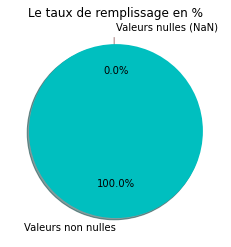

In [12]:
calc_inf(nutri_score, False)

# 2./ Analyse univariée:
****
     * un petit rappel des variable nutritionnelles (quantitatives) choisies, et leurs analyse en boxplot, et la deuxième liste de la totalité des variables pour l'application

     * Variables quantitatives:

        nutrition-score-fr_100g, energy_100g, proteins_100g, sugars_100g, fat_100g, saturated-fat_100g, carbohydrates_100g, .....

    * Variables qualitatives:

        product_name: Nom du produit
        brands: Marque du produit
        pnns_groups_1 : groupe d'aliments auquel appartient l'observation
        pnns_groups_2 : sous-groupe d'aliments auquel appartient l'observation
        nutrition_grade_fr
        brands
****

***
     * Observons les indicateurs de statistiques descriptives de l'ensemble des variables.
***

In [13]:
slct_ingr = ['energy_100g',
            'fat_100g',
            'saturated-fat_100g',
            'cholesterol_100g',
            'carbohydrates_100g',
            'sugars_100g', 
            'fiber_100g',
            'proteins_100g',
            'salt_100g',
            ]

In [14]:
slct_ingr_1 = ['energy_100g',
            'fat_100g',
            'saturated-fat_100g',
            'cholesterol_100g',
            'carbohydrates_100g',
            'sugars_100g', 
            'fiber_100g',
            'proteins_100g',
            'salt_100g',
            'nutrition-score-fr_100g']

In [15]:
list_food_facts = ['code',  
                     'creator',
                     'created_datetime', 
                     'product_name', 
                     'brands',
                     'countries_fr', 
                     'nutrition_grade_fr',
                     'pnns_groups_1', 
                     'pnns_groups_2', 
                     'energy_100g', 
                     'fat_100g', 
                     'saturated-fat_100g',
                     'cholesterol_100g', 
                     'carbohydrates_100g', 
                     'sugars_100g', 
                     'fiber_100g',
                     'proteins_100g', 
                     'salt_100g',
                     'nutrition-score-fr_100g']

In [16]:
nutri_score.describe()
# Indicateurs de distribution des variables

energy_100g       fat_100g  saturated-fat_100g  cholesterol_100g  \
count  214614.000000  214614.000000   214614.000000       214614.000000     
mean     1171.895717      13.185933        4.866561            0.018244     
std       752.320241      15.277566        7.086464            0.029108     
min         0.000000       0.000000        0.000000            0.000000     
25%       452.000000       1.110000        0.000000            0.000000     
50%      1188.000000       8.930000        1.790000            0.007369     
75%      1711.000000      20.100000        7.140000            0.019019     
max      3736.000000     100.000000       60.380000            0.356400     

       carbohydrates_100g    sugars_100g     fiber_100g  proteins_100g  \
count   214614.000000      214614.000000  214614.000000  214614.000000   
mean        33.232691          15.038211       2.671518       7.719618   
std         27.300999          19.813287       3.860846       7.775256   
min          0.000000           0.000000       0.000000       0.000000   
25%          7.920000           1.300000       0.000000       2.000000   
50%         28.570000           5.050000       1.600000       5.700000   
75%         57.140000          23.080000       3.500000      10.710000   
max        100.000000         100.000000      40.800000      60.000000   

           salt_100g  nutrition-score-fr_100g  
count  214614.000000   214614.000000           
mean        1.152080        9.153289           
std         2.832935        9.049506           
min         0.000000      -15.000000           
25%         0.100000        1.000000           
50%         0.650240       10.000000           
75%         1.361440       16.000000           
max        68.200000       40.000000

Text(0.5, 1.0, 'Représentation Box plot des variables quantitatives nutritionnelles')

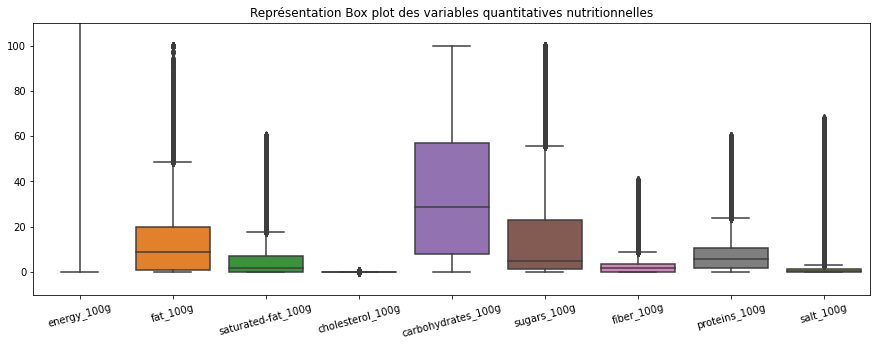

In [17]:
fig = plt.figure(figsize=(15, 5))
ax = plt.axes()
plt.xticks(rotation=15)
ax.set_ylim([-10,110])
sns.boxplot(data = nutri_score[slct_ingr]).set_title('Représentation Box plot des variables quantitatives nutritionnelles')

Indicateurs de distribution pour energy_100g
--------------------------------------------------
count    214614.000000
mean       1171.895717
std         752.320241
min           0.000000
25%         452.000000
50%        1188.000000
75%        1711.000000
max        3736.000000
Name: energy_100g, dtype: float64
Indicateurs de distribution pour fat_100g
--------------------------------------------------
count    214614.000000
mean         13.185933
std          15.277566
min           0.000000
25%           1.110000
50%           8.930000
75%          20.100000
max         100.000000
Name: fat_100g, dtype: float64
Indicateurs de distribution pour saturated-fat_100g
--------------------------------------------------
count    214614.000000
mean          4.866561
std           7.086464
min           0.000000
25%           0.000000
50%           1.790000
75%           7.140000
max          60.380000
Name: saturated-fat_100g, dtype: float64
Indicateurs de distribution pour cholesterol_100g


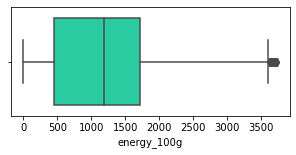

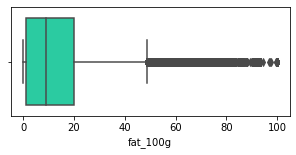

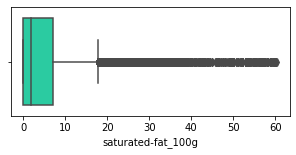

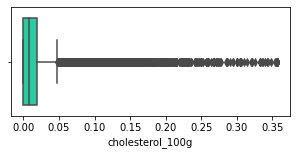

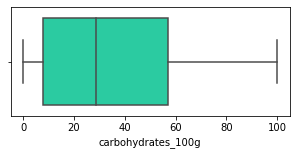

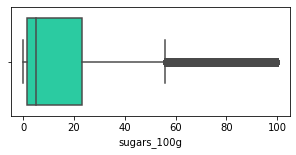

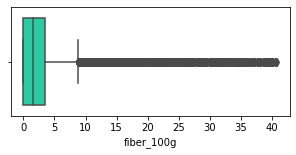

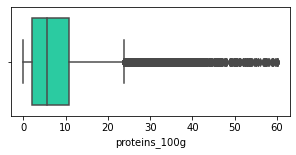

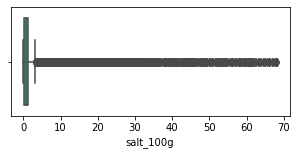

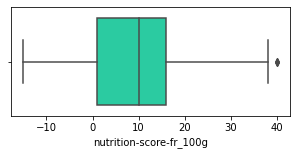

In [18]:
for col in nutri_score[slct_ingr_1].columns:
    fig = plt.figure(figsize=(5, 2))
    
    sns.boxplot(x=nutri_score[col], color='#11E5AD')
    print("Indicateurs de distribution pour",col)
    print('-'*50)
    print( nutri_score[col].describe())

### variables qualitatives : Nutriscore_grade

****    
    * le nutrition_grade_fr est une variable qualitatives ordinales, qui indique le nutri-score des individus.
****    

(array([], dtype=float64), [])

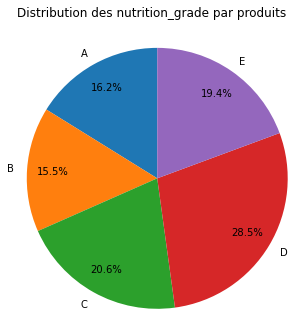

In [19]:
y = nutri_score['nutrition_grade_fr'].value_counts(normalize=False).sort_index()
labels=['A','B','C','D','E']

plt.pie(y, labels = labels, pctdistance=0.8, labeldistance=1.1, startangle=90, radius=1.5, autopct = '%1.1f%%', 
         normalize=True)
plt.suptitle('Distribution des nutrition_grade par produits',y=1.1, fontsize = 12)

plt.xticks(rotation=45)



# 3./ Analyse multivariée:

## 3.1./ Analyse Bivariée

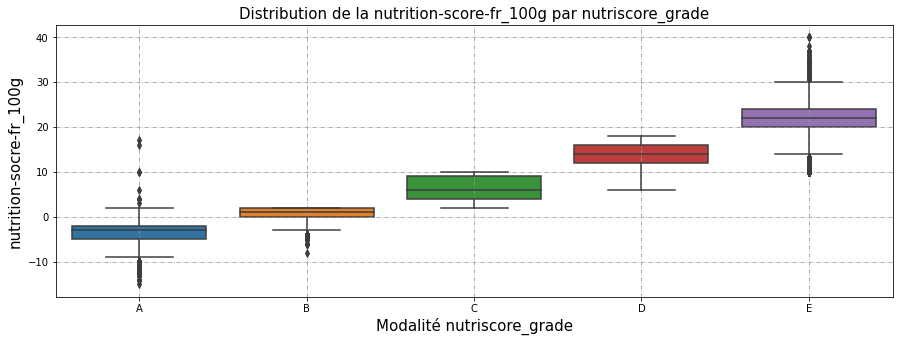

In [20]:
data = nutri_score
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
order = sorted(nutri_score["nutrition_grade_fr"].unique())
ax = sns.boxplot(data=data, x='nutrition_grade_fr', y='nutrition-score-fr_100g', order = order )
ax.set_title("Distribution de la nutrition-score-fr_100g par nutriscore_grade", fontsize = 15)
ax.set_xlabel("Modalité nutriscore_grade",fontsize = 15)
ax.set_ylabel("nutrition-socre-fr_100g", fontsize = 15)
plt.grid(True, color='0.6', dashes=(5,2,1,2))

plt.show()

### Remarques :

*****
     * En dessous la distribution de la nutrition-score-fr_100g par nutri-grade, selon le boxplot voici les intervalles de chaque nutri-grade en fonction de nutri-score:
        
    
        * A : entre -15 et 2
        * B : entre 0 et 2
        * C : entre 2 et 10
        * D : entre 11 et 20
        * E : entre 20 et 40
        
*****

  ******
  ### - La projection de chaque variable sur nutrition_grade_fr
 ******

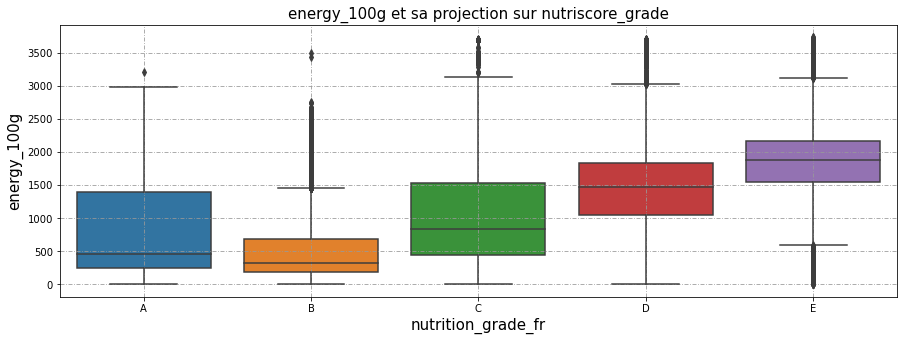

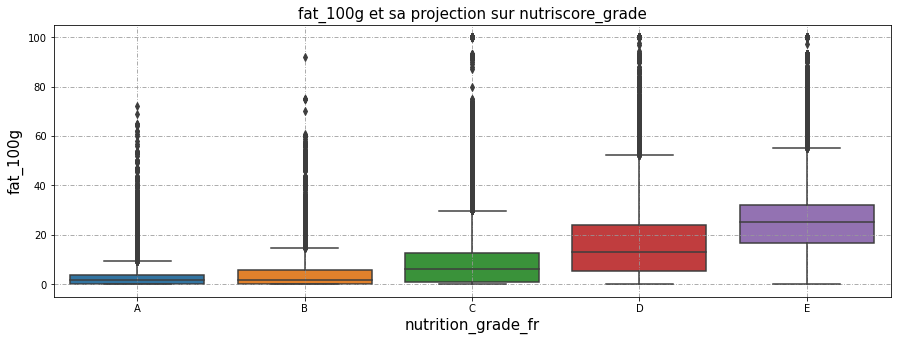

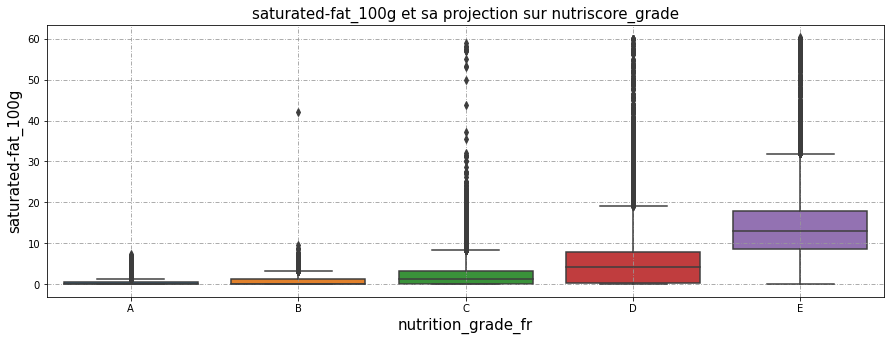

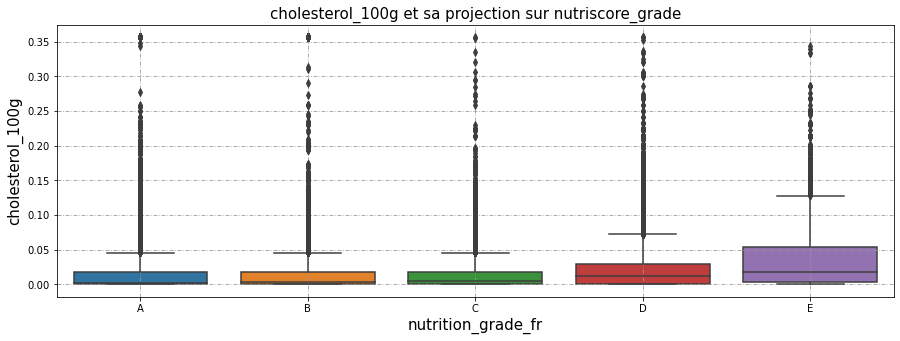

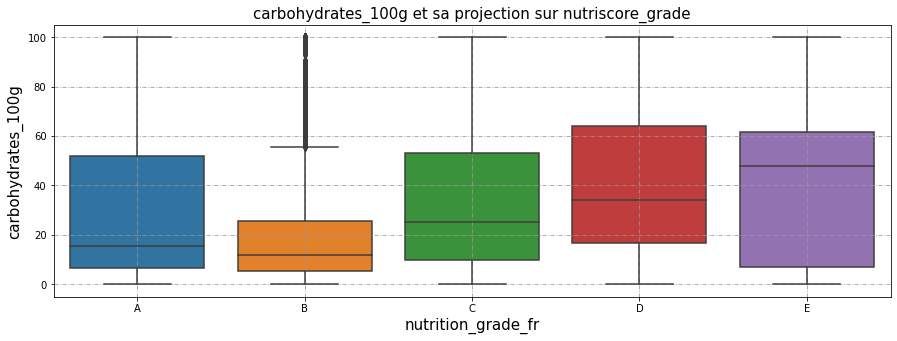

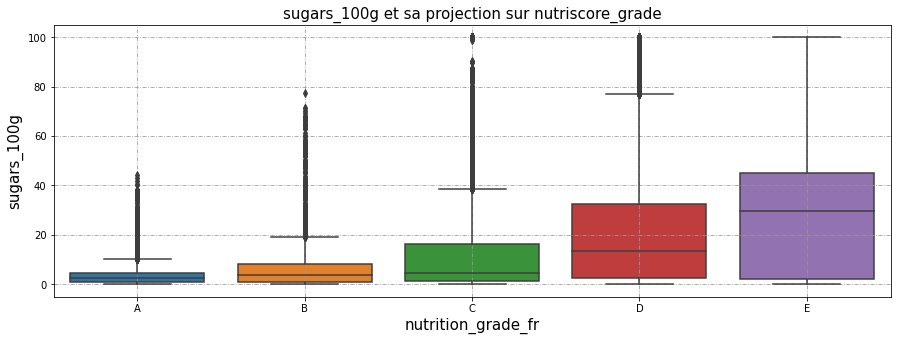

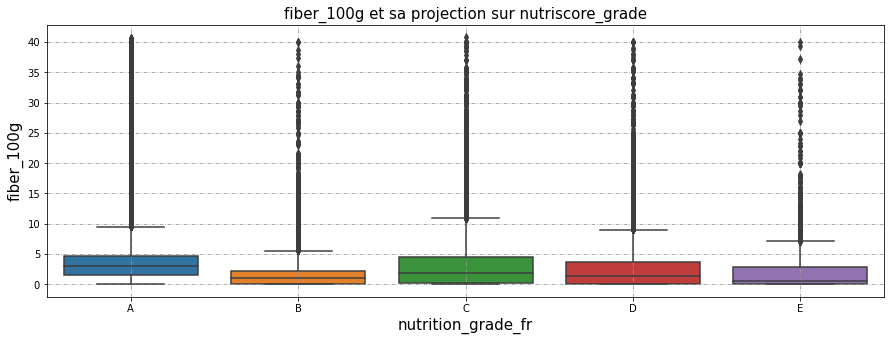

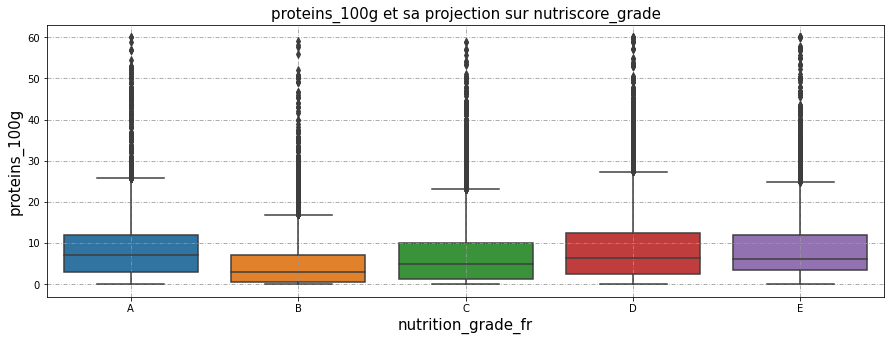

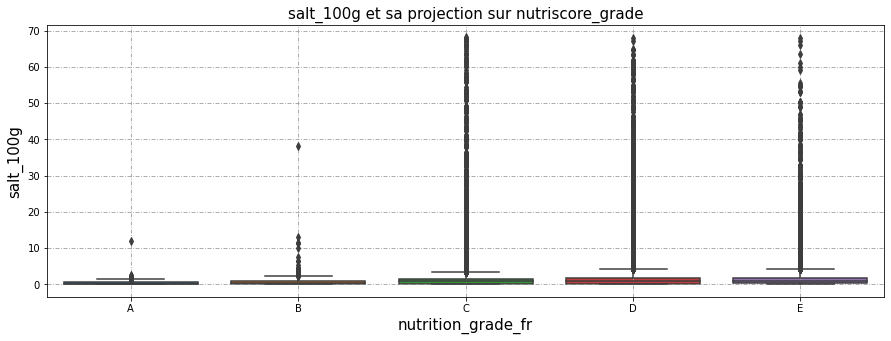

In [21]:
data = nutri_score[slct_ingr]
order = sorted(nutri_score["nutrition_grade_fr"].unique())
for i in nutri_score[slct_ingr].columns:
    fig = plt.figure(figsize=(15,5))
    ax = sns.boxplot(data=nutri_score, x='nutrition_grade_fr', y=i, order = order )
    ax.set_title(i +' et sa projection sur nutriscore_grade', fontsize = 15)
    ax.set_xlabel("nutrition_grade_fr",fontsize = 15)
    ax.set_ylabel( i , fontsize = 15)
    plt.grid(True, color='0.6', dashes=(5,2,1,2))
    plt.show()

### Remarques :
******
     * La distribution de la varibale nutri-score évolue linéairement avec les modalités de la variable nutri-grade. 
     
     * Plus il y a de sucre ('sugars_100g'), de graisses ('fat_100g','saturated-fat_100g','cholesterol_100g',) 
     et de sel ('salt_100g') dans un produit et plus son Nutri-Score est mauvais.
     
     * pour le reste des variables ce n'est pas le cas, donc le calcul de nutri-scor est basé sur 
     les nutritions qui évoluent de manière linéaire

______________________________________
******

****
     * Pour avoir une vue globale regardons les digrammes de dispersion des couples de variables numériques. 

     * A cette première lecture plusieurs liaisons linéaires semblent possibles. 
****

### Analyse bivariée pairplot données quantitaives

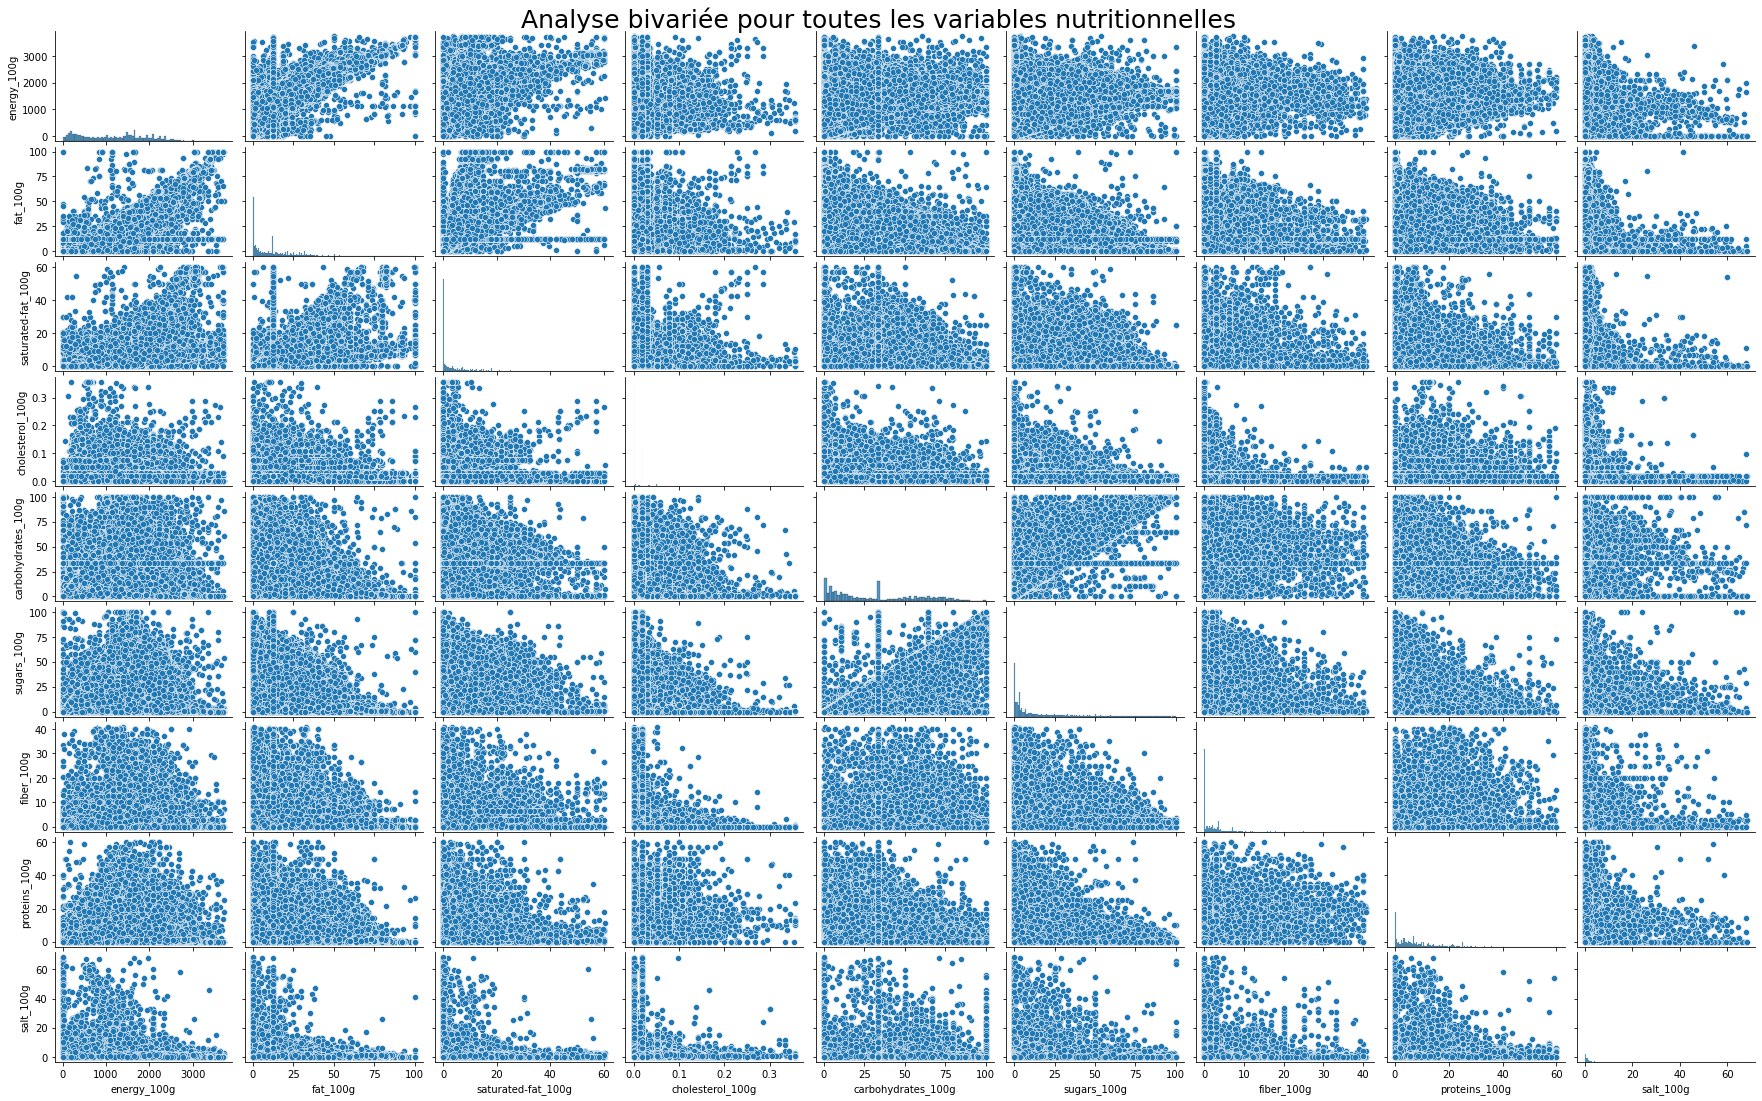

In [22]:
from pandas.plotting import scatter_matrix
#scatter_matrix(nutri_score[slct_ingr], figsize =(25, 25))
#plt.title('Analyse multivariée pour toutes les variables nutritionnelles',y=0.92, fontsize = 20)

g = sns.pairplot(nutri_score[slct_ingr])
g.fig.suptitle("Analyse bivariée pour toutes les variables nutritionnelles", y=1.01,fontsize = 25)
g.fig.set_size_inches(25,15)
plt.show()

### Matrice de correlations linéaires Heatmap

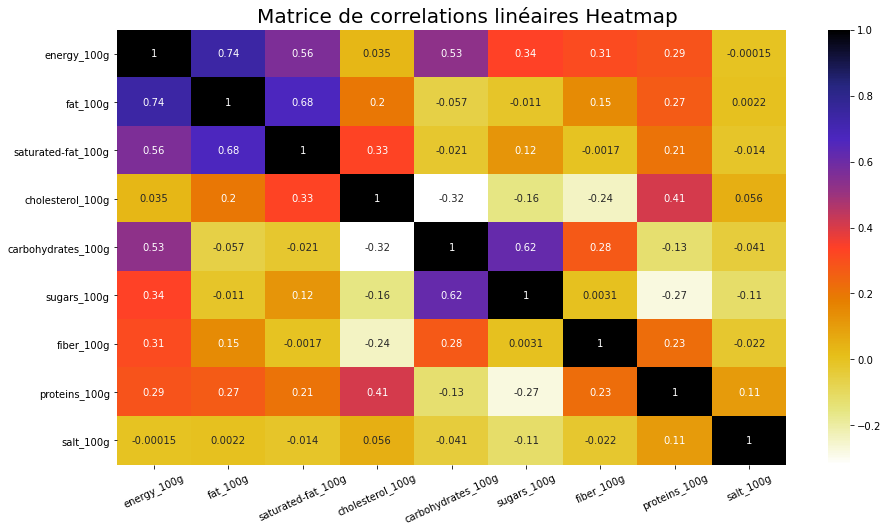

In [23]:
cor = nutri_score[slct_ingr].corr()
fig, ax = plt.subplots(figsize=(15,8)) 
sns.heatmap(cor, annot=True, cmap= plt.cm.CMRmap_r)
plt.suptitle('Matrice de correlations linéaires Heatmap',x=0.45,y=0.92, fontsize = 20)
plt.xticks(rotation=25)

plt.show()

### Remarques :
****
    
    * On constate la présence de corrélations entre les variables suivantes:
    
        * energy_100g et fat_100g ==> 0.74
        * energy_100g et nutrition-score-fr_100g ==> 0.62
        * fat_100g et saturated_fat_100g ==> 0.68
        * saturated_fat_100g et nutrition-score-fr_100g ==> 0.63
        * sugars_100g et carbohydrates_100g ==> 0.62
        * energy_100g et carbohydrates_100g ==> 0.56
        * sugars_100g et nutrition-score-fr_100g ==> 0.41
****

### Analyse bivariée pairplot données quantitaives et qualitatives

*****
     * l'ensemble des variables en foction de nutri-grade
*****

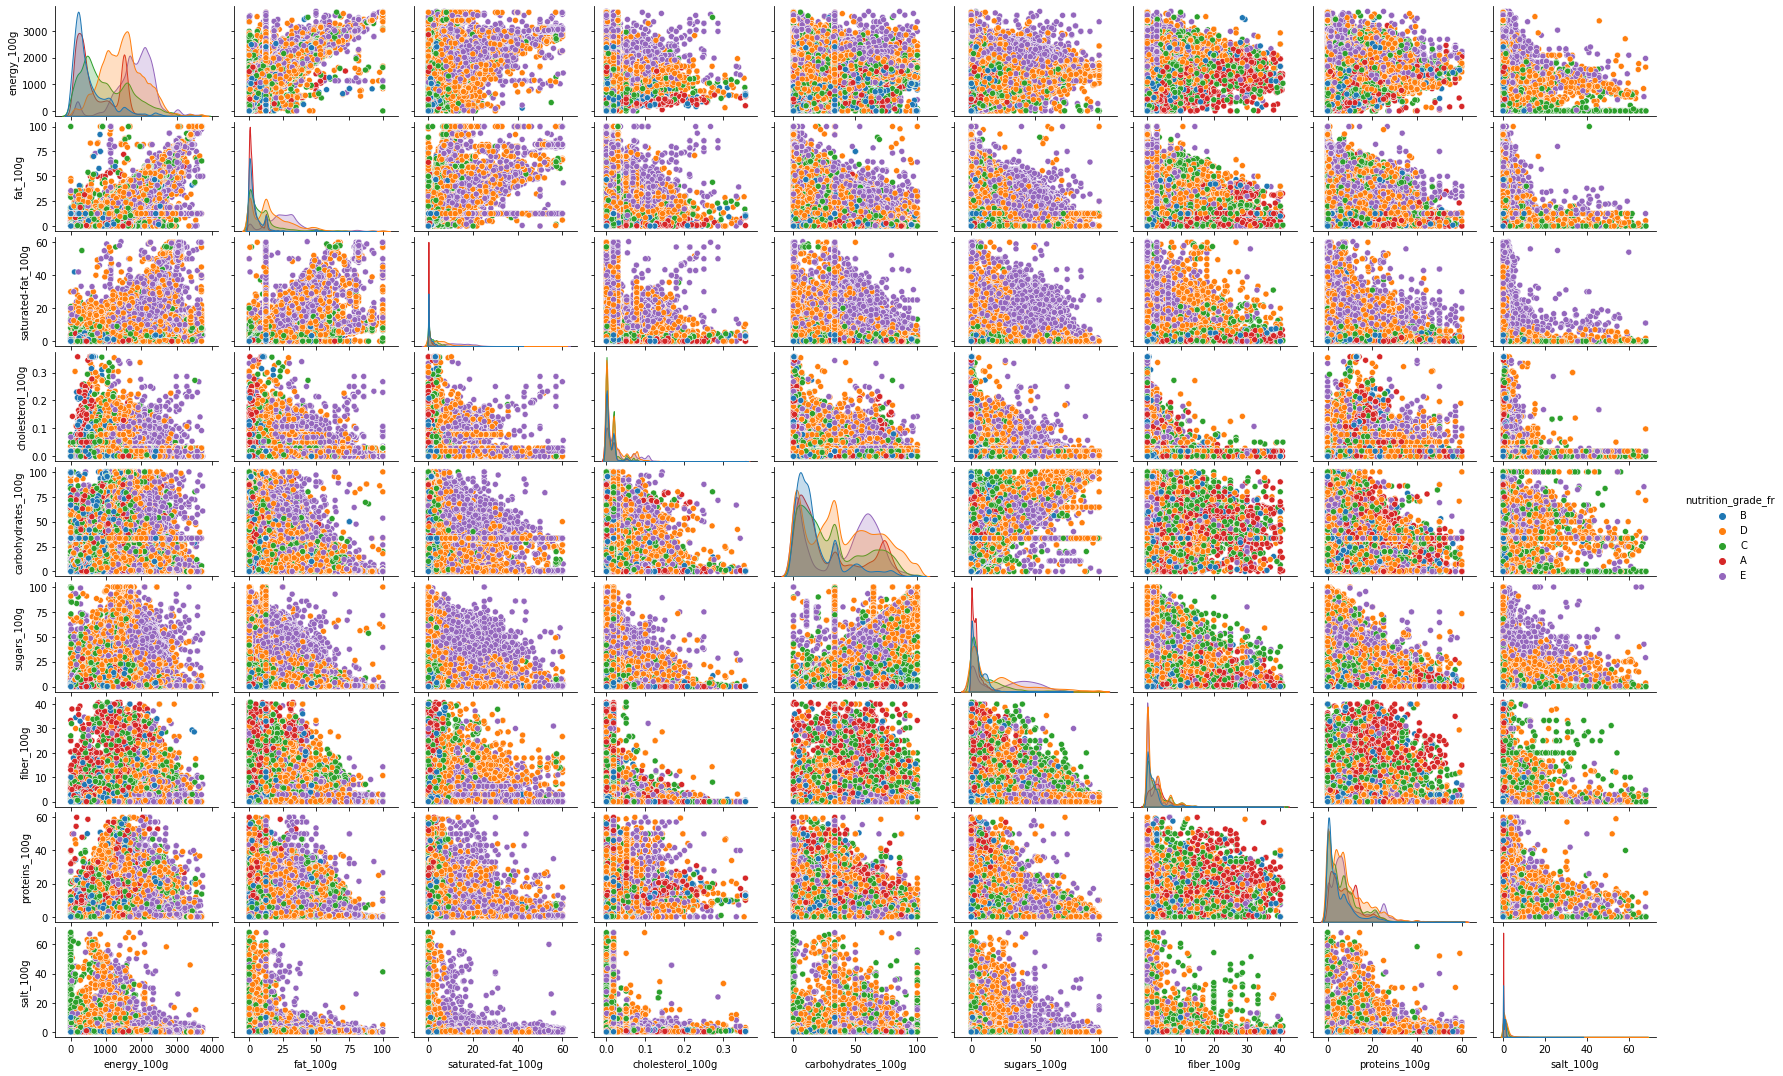

In [24]:
plot_cols =  ['energy_100g',
            'fat_100g',
            'saturated-fat_100g',
            'cholesterol_100g',
            'carbohydrates_100g',
            'sugars_100g', 
            'fiber_100g',
            'proteins_100g',
            'salt_100g',
             'nutrition_grade_fr']
nutri_data = nutri_score.loc[:,plot_cols]
g=sns.pairplot(data=nutri_data, hue="nutrition_grade_fr")


g.fig.set_size_inches(25,15)

## 3.2./ Analyse par composantes principales: ACP / PCA
***** 
    * étudier la variabilité des individus (leurs ressemblances et différences) ;

    * étudier les liaisons entre les variables (et au besoin, regrouper les variables liées en nouvelles variables synthétiques pour réduire le nombre de colonnes de nos données).
******

*****
    * l'analyse multivarié sera faite avec l'ACP sur l'ensemble des variables quantitatives suivantes :
    
        * 'energy_100g'
        * 'fat_100g'
        * 'saturated-fat_100g'
        * 'cholesterol_100g'
        * 'carbohydrates_100g'
        * 'sugars_100g'
        * 'fiber_100g'
        * 'proteins_100g'*
        * 'salt_100g'

*****

In [25]:
nutri_score.columns

Index(['code', 'creator', 'created_datetime', 'product_name', 'brands',
       'countries_fr', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [26]:
# choix du nombre de composantes à calculer
n_comp = 9


# selection des colonnes quantitative à prendre en compte dans l'ACP sans 'nutrition-score-fr_100g'

pca_col = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 
            'fiber_100g', 'proteins_100g', 'salt_100g']

# préparation des données pour l'ACP
X = nutri_score[pca_col].values
features  = nutri_score[pca_col].columns

In [27]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [28]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=9)

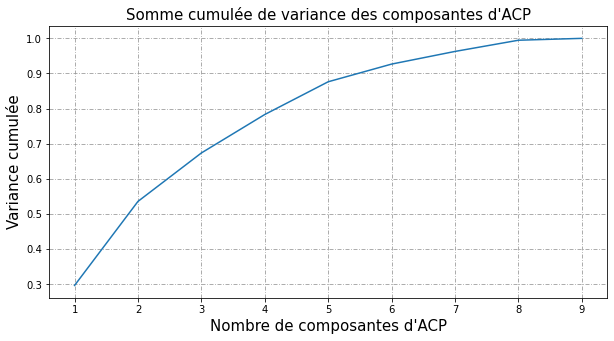

In [29]:
plt.figure(figsize=(10,5))
plt.title('Somme cumulée de variance des composantes d\'ACP', fontsize= 15)
plt.xlabel('Nombre de composantes d\'ACP', fontsize= 15)
plt.ylabel('Variance cumulée', fontsize= 15)
plt.plot(np.linspace(1,9,9),np.cumsum(pca.explained_variance_ratio_))
plt.grid(True, color='0.6', dashes=(5,2,1,2))


****
    * On constate qu'à partir de 6 features on a une variance cumulée de plus de 90 %. ce pourcentage de variance explique pour quoi on'a choisis 8 composantes. On pourrait donc réduire notre jeu de données à 6 dimensions.
****

In [30]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(14,14))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', 
                                 rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1), fontsize = 15)
            plt.show(block=False)

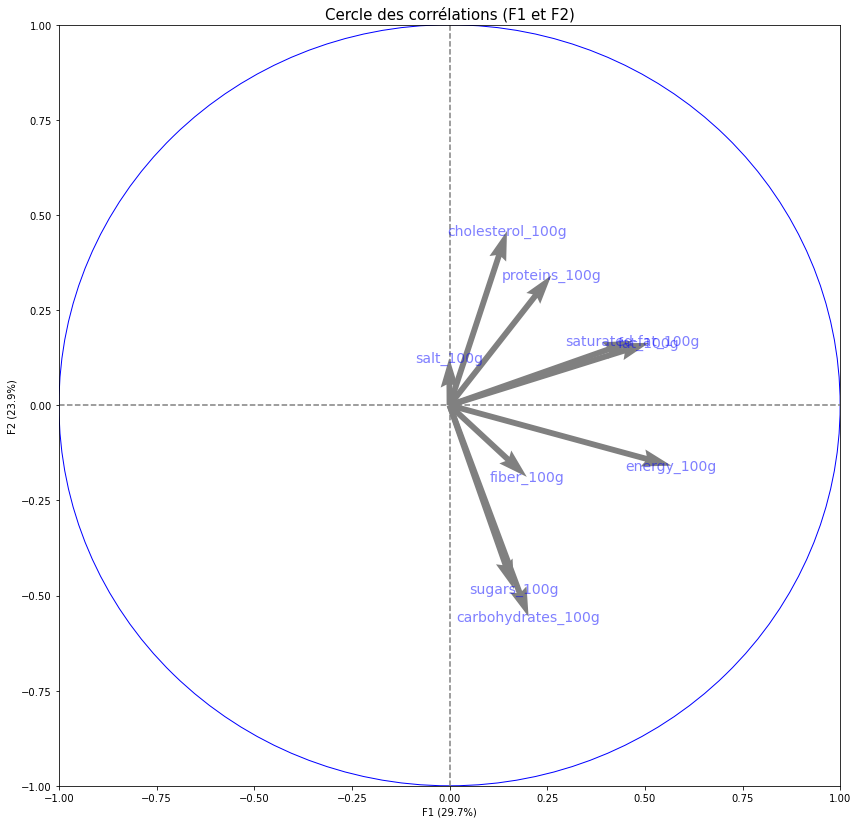

In [31]:
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

****
    * On constate que la première composante principale est représentée par l'énergie 'energy_100g' et les graisses 'fat_100g', 'saturated-fat_100g'
    * Pour la seconde c'est entre le sucre 'sugars_100g' et les 'carbohydrates_100g'.
****

In [32]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(8,8))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha, color = '#11E5AD')
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='20', ha='center',va='center', color='red') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='red', ls='--')
            plt.plot([0, 0], [-100, 100], color='red', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1), fontsize = 15)
            plt.show(block=False)


   *** 
    * Projection des individus des observations sur les 4 premiers plans des composantes principales.
   ****

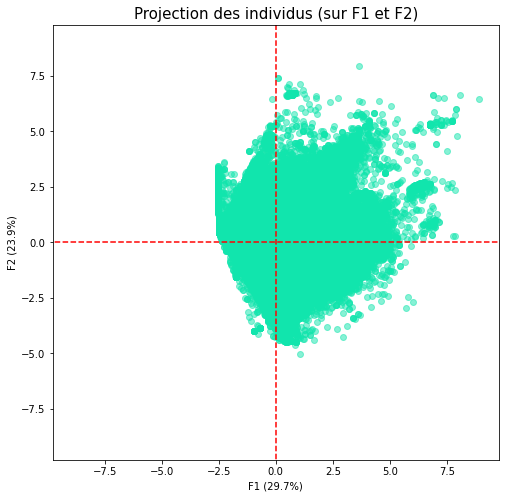

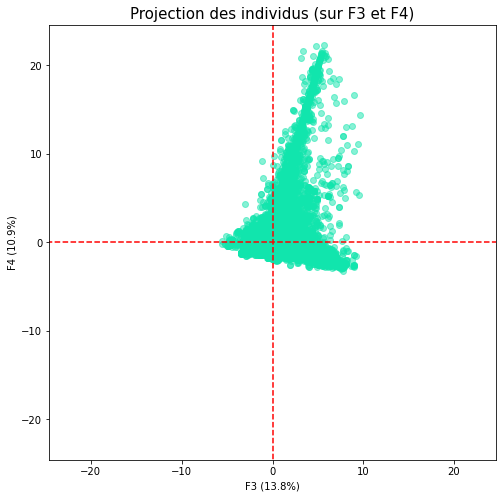

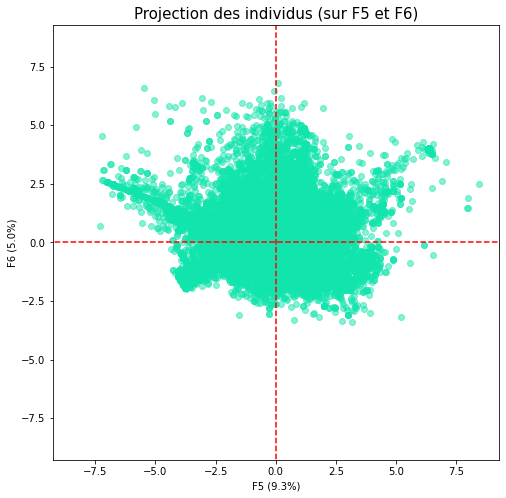

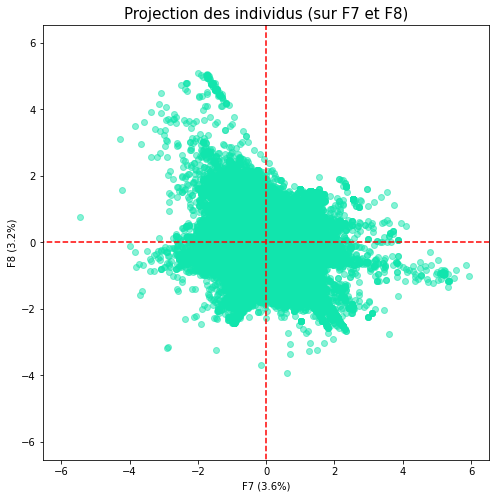

In [33]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5),(6,7)], alpha = 0.5)

plt.show()

   *** 
    * Projection des individus des observations sur les 3 premiers plans des composantes principales.
   ****

In [34]:
def display_scree_plot(pca):
    fig = plt.figure(figsize = (12,7))
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie", fontsize = 20)
    plt.ylabel("pourcentage d'inertie", fontsize = 20)
    plt.title("Eboulis des valeurs propres", fontsize = 20)
    plt.grid(True, color='0.6', dashes=(5,2,1,2))
    plt
    plt.show(block=False)

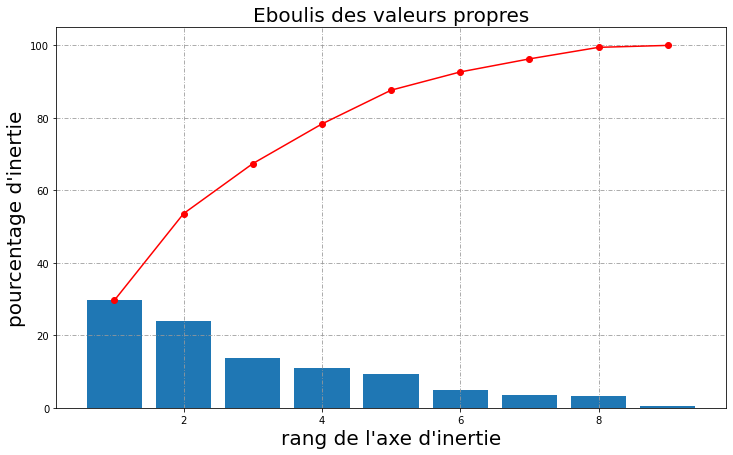

In [35]:
# Eboulis des valeurs propres
display_scree_plot(pca)

## 3.3./ Analyse de la variance (ANOVA)
****
    * Hypothèses stochastiques:
        1. les échantillons sont issus d’une population normale (gaussienne): on parle de test paramétrique
        2. les variances conditionnelles (variances dans chaque souspopulation) sont identiques : homoscédasticité
        3. les sous-échantillons sont indépendants 

    * En toute rigueur, on devrait vérifier les deux premières hypothèses pour que l'analyse ANOVA soit valide
*****


### 3.1. Test de normalité avec Shapiro-Wilk test:


In [36]:
import scipy.stats as stats
slc_col = nutri_score[slct_ingr]

for col in slc_col:
    alpha = 5e-2
    print("**********************\n")
    w, pvalue = stats.shapiro(nutri_score[col])
    print("w = {0} / p = {1}".format(w,pvalue))
    
    if pvalue < alpha:  # hypothese nulle signifie une distribution normale
        print("Hypothèse nulle est rejetée : {} n'est pas de distribution normale\n".format(col))
    else:
        print("Hypothèse nulle ne peut être rejetée :{}, on considère l'hypothèse de normalité".format(col))

**********************

w = 0.9590280055999756 / p = 0.0
Hypothèse nulle est rejetée : energy_100g n'est pas de distribution normale

**********************

w = 0.8093333840370178 / p = 0.0
Hypothèse nulle est rejetée : fat_100g n'est pas de distribution normale

**********************

w = 0.7134019136428833 / p = 0.0
Hypothèse nulle est rejetée : saturated-fat_100g n'est pas de distribution normale

**********************

w = 0.6496957540512085 / p = 0.0
Hypothèse nulle est rejetée : cholesterol_100g n'est pas de distribution normale

**********************

w = 0.9139009118080139 / p = 0.0
Hypothèse nulle est rejetée : carbohydrates_100g n'est pas de distribution normale

**********************

w = 0.7595289945602417 / p = 0.0
Hypothèse nulle est rejetée : sugars_100g n'est pas de distribution normale

**********************

w = 0.6707085371017456 / p = 0.0
Hypothèse nulle est rejetée : fiber_100g n'est pas de distribution normale

**********************

w = 0.8492425084114075 

C:\Users\Win\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


****    
    * Selon le test de normalité avec Shapiro-Wilk la distribution n'est pas normale, dans ce cas l'analyse d'ANOVA n'est pas valide, mais on va vérifier la deuxième condition 
****
### 3.1. Test d'homogénéité avec Levene’s test 

Le test de Levene peut être utilisé pour vérifier l'homogénéité des variances lorsque les données ne sont pas tirées de la distribution normale.

In [37]:
from scipy.stats import levene

levene(nutri_score[nutri_score['nutrition_grade_fr'] == 'A']['energy_100g'],
       nutri_score[nutri_score['nutrition_grade_fr'] == 'B']['energy_100g'],
       nutri_score[nutri_score['nutrition_grade_fr'] == 'C']['energy_100g'],
       nutri_score[nutri_score['nutrition_grade_fr'] == 'D']['energy_100g'],
       nutri_score[nutri_score['nutrition_grade_fr'] == 'E']['energy_100g'],
        center='mean')

LeveneResult(statistic=2226.86033511778, pvalue=0.0)

*****
    * Selon le test de Levene pvalue < 0.05 donc l'homogénéité n'est pas la même pour les nuri-grade sur la variable energy_100g.
Cela nou confirme encore une fois que le test de ANOVA n'est pas valide car les deux conditions la normalité ainsi que  l'homogénéité ne sont pas valides
*****

# 4. Calcul de Score nutrition Sport pour l'appli

In [38]:
nutri_score.shape

(214614, 19)

In [39]:
nutri_score_fnl = nutri_score.copy()

In [40]:
nutri_score_fnl.insert(19,'Score', 0)

In [41]:
scr = { 'fat_100g':-3,
         'cholesterol_100g':-1,
         'sugars_100g':-5,
         'fiber_100g':5,
         'proteins_100g':5,
         'salt_100g':1}

In [42]:
for index in nutri_score_fnl.index:
    s = 0
    for k in scr.keys():
        if k in nutri_score_fnl:
            s = s + nutri_score_fnl[k][index]*scr[k]
    nutri_score_fnl.at[index, 'Score' ] = s

In [43]:
nutri_score_fnl['Score'].max()

400

In [44]:
nutri_score_fnl['Score'].min()

-800

In [45]:
#nutri_score_fnl['Score'] = np.abs(nutri_score_fnl['Score'])/np.abs(nutri_score_fnl['Score'].sum())
nutri_score_fnl['Score'] = (nutri_score_fnl['Score']-nutri_score_fnl['Score'].min()) / (nutri_score_fnl['Score'].max() - nutri_score_fnl['Score'].min())
nutri_score_fnl.sort_values(by = ['Score'])

code         creator created_datetime    product_name  \
119956  0829364111197  usda-ndb-im...  2017-03-09T...   Markets, So...   
68896   0075450163896  usda-ndb-im...  2017-03-09T...    Vegetable Oil   
101705  0715483004239  usda-ndb-im...  2017-03-09T...   Dallies Tom...   
120622  0835976005427  usda-ndb-im...  2017-03-09T...   The Candy T...   
6966    0011225130397  usda-ndb-im...  2017-03-09T...      Frosted Mix   
...               ...             ...             ...              ...   
94563   0669556020032  usda-ndb-im...  2017-03-09T...   Nori Japane...   
45802   0047445301088  usda-ndb-im...  2017-03-09T...   Organic Toa...   
83304   0092396000047  usda-ndb-im...  2017-03-09T...   Tokyo Sushi...   
16145   0024182157697  usda-ndb-im...  2017-03-10T...   Sushi Nori ...   
16146   0024182157703  usda-ndb-im...  2017-03-09T...   Sushi Nori ...   

                brands countries_fr nutrition_grade_fr   pnns_groups_1  \
119956  Dierbergs, ...   États-Unis               D          To Define   
68896   Midwest Cou...   États-Unis               E     Fat And Sauces   
101705           Xcell   États-Unis               D          To Define   
120622  Jerry Kelly...   États-Unis               D          To Define   
6966    Over The To...   États-Unis               D          To Define   
...                ...          ...             ...                ...   
94563     Hissho Sushi   États-Unis               A          To Define   
45802   Sound Sea V...   États-Unis               A          To Define   
83304          Shirako   États-Unis               A          To Define   
16145   Eden Foods ...   États-Unis               A          To Define   
16146             Eden   États-Unis               A          To Define   

       pnns_groups_2  energy_100g  fat_100g  saturated-fat_100g  \
119956     To Define       1674.0    100.00            0.00       
68896           Fats       3586.0    100.00           14.29       
101705     To Define       1674.0    100.00            0.00       
120622     To Define       1452.0     97.67            0.00       
6966       To Define       2092.0     25.00            0.00       
...              ...          ...       ...             ...       
94563      To Define       1674.0      0.00            0.00       
45802      To Define        837.0      0.00            0.00       
83304      To Define       1674.0      0.00            0.00       
16145      To Define        837.0      0.00            0.00       
16146      To Define       1674.0      0.00            0.00       

        cholesterol_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
119956        0.000000            100.00           100.00    0.000000   
68896         0.000000              0.00            71.43    0.000000   
101705        0.000000             80.00            60.00    0.000000   
120622        0.018331             86.05            62.79    2.855478   
6966          0.000000            100.00           100.00    0.000000   
...                ...               ...              ...         ...   
94563         0.000000             40.00             0.00   40.000000   
45802         0.000000             40.00             0.00   40.000000   
83304         0.000000             40.00             0.00   40.000000   
16145         0.000000              0.00             0.00   40.000000   
16146         0.000000              0.00             0.00   40.000000   

        proteins_100g  salt_100g  nutrition-score-fr_100g     Score  
119956            0.0    0.00000            14.0           0.000000  
68896             0.0    0.00000            30.0           0.119167  
101705            0.0    0.00000            14.0           0.166667  
120622            0.0    0.09398            14.0           0.173333  
6966              0.0    0.00000            16.0           0.187500  
...               ...        ...             ...                ...  
94563            40.0    0.00000            -6.0           1.000000

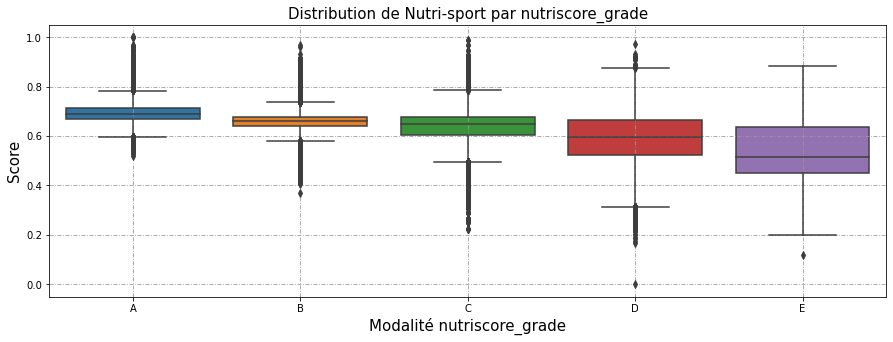

In [46]:
data = nutri_score_fnl
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
order = sorted(nutri_score_fnl["nutrition_grade_fr"].unique())
ax = sns.boxplot(data=data, x='nutrition_grade_fr', y='Score', order = order )
ax.set_title("Distribution de Nutri-sport par nutriscore_grade", fontsize = 15)
ax.set_xlabel("Modalité nutriscore_grade",fontsize = 15)
ax.set_ylabel("Score", fontsize = 15)
plt.grid(True, color='0.6', dashes=(5,2,1,2))

plt.show()